In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [2]:

pitching = pd.read_csv("../projectData/Pitching.csv")
people = pd.read_csv("../projectData/People.csv")
hof = pd.read_csv("../projectData/HallOfFame.csv")


In [3]:
people

,ID,playerID,birthYear,birthMonth,birthDay,birthCity,birthCountry,birthState,deathYear,deathMonth,...,nameLast,nameGiven,weight,height,bats,throws,debut,bbrefID,finalGame,retroID
0,1,aardsda01,1981.0,12.0,27.0,Denver,USA,CO,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,aardsda01,2015-08-23,aardd001
1,2,aaronha01,1934.0,2.0,5.0,Mobile,USA,AL,2021.0,1.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,aaronha01,1976-10-03,aaroh101
2,3,aaronto01,1939.0,8.0,5.0,Mobile,USA,AL,1984.0,8.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,aaronto01,1971-09-26,aarot101
3,4,aasedo01,1954.0,9.0,8.0,Orange,USA,CA,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,aasedo01,1990-10-03,aased001
4,5,abadan01,1972.0,8.0,25.0,Palm Beach,USA,FL,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,abadan01,2006-04-13,abada001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21266,20672,zupofr01,1939.0,8.0,29.0,San Francisco,USA,CA,2005.0,3.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,zupofr01,1961-05-09,zupof101
21267,20673,zuvelpa01,1958.0,10.0,31.0,San Mateo,USA,CA,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,zuvelpa01,1991-05-02,zuvep001
21268,20674,zuverge01,1924.0,8.0,20.0,Holland,USA,MI,2014.0,9.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,zuverge01,1959-06-15,zuveg101
21269,20675,zwilldu01,1888.0,11.0,2.0,St. Louis,USA,MO,1978.0,3.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,zwilldu01,1916-07-12,zwild101


In [4]:
#career totals

In [5]:
pitching["IP"] = pitching["IPouts"] / 3
career = pitching.groupby("playerID").agg({
    "W": "sum",
    "L": "sum",
    "G": "sum",
    "GS": "sum",
    "CG": "sum",
    "SHO": "sum",
    "SV": "sum",
    "IPouts": "sum",
    "IP": "sum",
    "H": "sum",
    "ER": "sum",
    "HR": "sum",
    "BB": "sum",
    "SO": "sum",
    "IBB": "sum",
    "WP": "sum",
    "HBP": "sum",
    "BK": "sum",
    "BFP": "sum",
    "GF": "sum",
    "R": "sum",
    "SH": "sum",
    "SF": "sum",
    "GIDP": "sum"
}).reset_index()

In [6]:
# ERA
career["ERA_career"] = 9 * career["ER"] / career["IP"]

# WHIP
career["WHIP"] = (career["BB"] + career["H"]) / career["IP"]

# K/9, BB/9, HR/9
career["K9"]   = 9 * career["SO"] / career["IP"]
career["BB9"]  = 9 * career["BB"] / career["IP"]
career["HR9"]  = 9 * career["HR"] / career["IP"]

# K% and BB%
career["K_pct"]  = career["SO"] / career["BFP"]
career["BB_pct"] = career["BB"] / career["BFP"]

In [7]:
people["status"] = people["finalGame"].apply(
    lambda x: "retired" if pd.notna(x) else "active"
)


In [8]:
career = career.merge(
    people[["playerID", "nameGiven", "nameLast", "debut", "status"]],
    on="playerID",
    how="left"
)

career = career.dropna(subset=["ERA_career"])
career

,playerID,W,L,G,GS,CG,SHO,SV,IPouts,IP,...,WHIP,K9,BB9,HR9,K_pct,BB_pct,nameGiven,nameLast,debut,status
0,aardsda01,16,18,331,0,0,0,69,1011,337.000000,...,1.421365,9.080119,4.887240,1.094955,0.230508,0.124068,David Allan,Aardsma,2004-04-06,retired
1,aasedo01,66,60,448,91,22,5,82,3328,1109.333333,...,1.390024,5.200421,3.707632,0.722055,0.135518,0.096617,Donald William,Aase,1977-07-26,retired
2,abadfe01,9,29,406,6,0,0,2,1064,354.666667,...,1.322368,7.409774,3.197368,1.141917,0.192994,0.083278,Fernando Antonio,Abad,2010-07-28,retired
3,abbeybe01,22,40,79,65,52,0,1,1704,568.000000,...,1.545775,2.551056,3.042254,0.285211,0.062695,0.074766,Bert Wood,Abbey,1892-06-14,retired
4,abbeych01,0,0,1,0,0,0,0,6,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Charles S.,Abbey,1893-08-16,retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,zulueyo01,0,0,12,0,0,0,0,49,16.333333,...,1.346939,11.020408,3.857143,1.102041,0.289855,0.101449,Yosver Jose,Zulueta,2024-06-25,active
10740,zumayjo01,13,12,171,0,0,0,5,629,209.666667,...,1.349762,9.014308,4.893482,0.772655,0.230516,0.125137,Joel Martin,Zumaya,2006-04-03,retired
10741,zuniggu01,0,0,17,0,0,0,2,59,19.666667,...,1.322034,7.322034,3.661017,2.288136,0.190476,0.095238,Guillermo Enrique,Zuñiga,2023-05-02,active
10742,zuverge01,32,36,265,31,9,2,40,1927,642.333333,...,1.343539,3.124546,2.844318,0.784639,0.081209,0.073926,George,Zuverink,1951-04-21,retired


In [9]:
active = career[career['status'] == 'active']
active

,playerID,W,L,G,GS,CG,SHO,SV,IPouts,IP,...,WHIP,K9,BB9,HR9,K_pct,BB_pct,nameGiven,nameLast,debut,status
5,abbotan01,18,16,46,46,0,0,0,742,247.333333,...,1.305930,8.514825,3.493261,1.491914,0.223923,0.091866,Andrew Cole,Abbott,2023-06-05,active
21,abreubr01,13,8,247,0,0,0,9,776,258.666667,...,1.179124,11.934278,4.070876,0.730670,0.319664,0.109040,Bryan Enrique,Abreu,2019-07-31,active
39,adamja01,19,11,276,0,0,0,24,809,269.666667,...,0.997528,10.679852,3.304079,1.001236,0.295749,0.091497,Jason Kendall,Adam,2018-05-05,active
42,adamsau02,7,7,188,2,0,0,0,467,155.666667,...,1.336188,12.892934,5.665953,0.635974,0.316312,0.139007,Austin Lance,Adams,2017-07-15,active
59,adcocty01,0,0,15,0,0,0,0,60,20.000000,...,1.000000,6.300000,0.900000,3.600000,0.177215,0.025316,Tyler Nathan McKenzie,Adcock,2023-06-12,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10711,zeferry01,0,0,12,0,0,0,0,51,17.000000,...,0.764706,9.529412,3.176471,0.000000,0.281250,0.093750,Ryan Joseph,Zeferjahn,2024-08-25,active
10717,zerpaan01,7,5,79,6,0,0,0,337,112.333333,...,1.317507,7.370920,2.483680,1.201780,0.189691,0.063918,Angel David,Zerpa,2021-09-30,active
10738,zuberty01,1,5,56,0,0,0,0,158,52.666667,...,1.575949,10.082278,6.664557,1.879747,0.248945,0.164557,John Tyler,Zuber,2020-07-24,active
10739,zulueyo01,0,0,12,0,0,0,0,49,16.333333,...,1.346939,11.020408,3.857143,1.102041,0.289855,0.101449,Yosver Jose,Zulueta,2024-06-25,active


In [10]:
retired = career[career['status'] == 'retired'].copy()
retired

,playerID,W,L,G,GS,CG,SHO,SV,IPouts,IP,...,WHIP,K9,BB9,HR9,K_pct,BB_pct,nameGiven,nameLast,debut,status
0,aardsda01,16,18,331,0,0,0,69,1011,337.000000,...,1.421365,9.080119,4.887240,1.094955,0.230508,0.124068,David Allan,Aardsma,2004-04-06,retired
1,aasedo01,66,60,448,91,22,5,82,3328,1109.333333,...,1.390024,5.200421,3.707632,0.722055,0.135518,0.096617,Donald William,Aase,1977-07-26,retired
2,abadfe01,9,29,406,6,0,0,2,1064,354.666667,...,1.322368,7.409774,3.197368,1.141917,0.192994,0.083278,Fernando Antonio,Abad,2010-07-28,retired
3,abbeybe01,22,40,79,65,52,0,1,1704,568.000000,...,1.545775,2.551056,3.042254,0.285211,0.062695,0.074766,Bert Wood,Abbey,1892-06-14,retired
4,abbeych01,0,0,1,0,0,0,0,6,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Charles S.,Abbey,1893-08-16,retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10736,zoldasa01,43,53,250,93,30,5,8,2788,929.333333,...,1.352582,2.004663,2.914993,0.522956,0.052458,0.076280,Samuel Walter,Zoldak,1944-05-13,retired
10737,zuberbi01,43,42,224,65,23,3,6,2358,786.000000,...,1.571247,4.385496,5.358779,0.400763,0.110184,0.134638,William Henry,Zuber,1936-09-16,retired
10740,zumayjo01,13,12,171,0,0,0,5,629,209.666667,...,1.349762,9.014308,4.893482,0.772655,0.230516,0.125137,Joel Martin,Zumaya,2006-04-03,retired
10742,zuverge01,32,36,265,31,9,2,40,1927,642.333333,...,1.343539,3.124546,2.844318,0.784639,0.081209,0.073926,George,Zuverink,1951-04-21,retired


In [11]:
retired = retired.merge(
    hof[["playerID", "inducted"]],
    on="playerID",
    how="left"
)

In [12]:
retired

,playerID,W,L,G,GS,CG,SHO,SV,IPouts,IP,...,K9,BB9,HR9,K_pct,BB_pct,nameGiven,nameLast,debut,status,inducted
0,aardsda01,16,18,331,0,0,0,69,1011,337.000000,...,9.080119,4.887240,1.094955,0.230508,0.124068,David Allan,Aardsma,2004-04-06,retired,NaN
1,aasedo01,66,60,448,91,22,5,82,3328,1109.333333,...,5.200421,3.707632,0.722055,0.135518,0.096617,Donald William,Aase,1977-07-26,retired,NaN
2,abadfe01,9,29,406,6,0,0,2,1064,354.666667,...,7.409774,3.197368,1.141917,0.192994,0.083278,Fernando Antonio,Abad,2010-07-28,retired,NaN
3,abbeybe01,22,40,79,65,52,0,1,1704,568.000000,...,2.551056,3.042254,0.285211,0.062695,0.074766,Bert Wood,Abbey,1892-06-14,retired,NaN
4,abbeych01,0,0,1,0,0,0,0,6,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Charles S.,Abbey,1893-08-16,retired,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11684,zoldasa01,43,53,250,93,30,5,8,2788,929.333333,...,2.004663,2.914993,0.522956,0.052458,0.076280,Samuel Walter,Zoldak,1944-05-13,retired,NaN
11685,zuberbi01,43,42,224,65,23,3,6,2358,786.000000,...,4.385496,5.358779,0.400763,0.110184,0.134638,William Henry,Zuber,1936-09-16,retired,NaN
11686,zumayjo01,13,12,171,0,0,0,5,629,209.666667,...,9.014308,4.893482,0.772655,0.230516,0.125137,Joel Martin,Zumaya,2006-04-03,retired,NaN
11687,zuverge01,32,36,265,31,9,2,40,1927,642.333333,...,3.124546,2.844318,0.784639,0.081209,0.073926,George,Zuverink,1951-04-21,retired,NaN


In [13]:
retired["inducted"] = retired["inducted"].map({"Y": 1, "N": 0})
retired["inducted"] = retired["inducted"].fillna(0)  # Not voted = 0


In [14]:
features = [
    "IP","W","SO","H","ERA_career","G","HR9","BB","WHIP",
    "GS","L","BB9","K9","HR","SV"
]

# Replace missing values with 0
retired[features] = retired[features].fillna(0)


In [15]:

X = retired[features]
y = retired["inducted"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [17]:
X_train = retired[features]
y_train = retired["inducted"]
# Replace inf/-inf with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf,-np.inf],np.nan)
# Fill NaN with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [18]:
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [19]:
# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97      2894
         1.0       0.13      1.00      0.23        29

    accuracy                           0.93      2923
   macro avg       0.57      0.97      0.60      2923
weighted avg       0.99      0.93      0.96      2923



In [20]:
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

ROC-AUC: 0.980238543478779


In [21]:
active

,playerID,W,L,G,GS,CG,SHO,SV,IPouts,IP,...,WHIP,K9,BB9,HR9,K_pct,BB_pct,nameGiven,nameLast,debut,status
5,abbotan01,18,16,46,46,0,0,0,742,247.333333,...,1.305930,8.514825,3.493261,1.491914,0.223923,0.091866,Andrew Cole,Abbott,2023-06-05,active
21,abreubr01,13,8,247,0,0,0,9,776,258.666667,...,1.179124,11.934278,4.070876,0.730670,0.319664,0.109040,Bryan Enrique,Abreu,2019-07-31,active
39,adamja01,19,11,276,0,0,0,24,809,269.666667,...,0.997528,10.679852,3.304079,1.001236,0.295749,0.091497,Jason Kendall,Adam,2018-05-05,active
42,adamsau02,7,7,188,2,0,0,0,467,155.666667,...,1.336188,12.892934,5.665953,0.635974,0.316312,0.139007,Austin Lance,Adams,2017-07-15,active
59,adcocty01,0,0,15,0,0,0,0,60,20.000000,...,1.000000,6.300000,0.900000,3.600000,0.177215,0.025316,Tyler Nathan McKenzie,Adcock,2023-06-12,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10711,zeferry01,0,0,12,0,0,0,0,51,17.000000,...,0.764706,9.529412,3.176471,0.000000,0.281250,0.093750,Ryan Joseph,Zeferjahn,2024-08-25,active
10717,zerpaan01,7,5,79,6,0,0,0,337,112.333333,...,1.317507,7.370920,2.483680,1.201780,0.189691,0.063918,Angel David,Zerpa,2021-09-30,active
10738,zuberty01,1,5,56,0,0,0,0,158,52.666667,...,1.575949,10.082278,6.664557,1.879747,0.248945,0.164557,John Tyler,Zuber,2020-07-24,active
10739,zulueyo01,0,0,12,0,0,0,0,49,16.333333,...,1.346939,11.020408,3.857143,1.102041,0.289855,0.101449,Yosver Jose,Zulueta,2024-06-25,active


In [22]:
active[features] = active[features].replace([np.inf, -np.inf], np.nan).fillna(0)
X_active = active[features]


C:\Users\kate\AppData\Local\Temp\ipykernel_40472\4083946320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active[features] = active[features].replace([np.inf, -np.inf], np.nan).fillna(0)


In [23]:
active["hof_prob"] = rf.predict_proba(X_active)[:,1]  # probability of being inducted


C:\Users\kate\AppData\Local\Temp\ipykernel_40472\927259504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active["hof_prob"] = rf.predict_proba(X_active)[:,1]  # probability of being inducted


In [ ]:
top_active = active.sort_values("hof_prob", ascending=False)
top_active.head(20)
#still need to filter out position players who pitched like 5 innings


,playerID,W,L,G,GS,CG,SHO,SV,IPouts,IP,...,K9,BB9,HR9,K_pct,BB_pct,nameGiven,nameLast,debut,status,hof_prob
5044,kershcl01,212,94,432,429,25,15,0,8228,2742.666667,...,9.739426,2.224842,0.744895,0.274408,0.062685,Clayton Edward,Kershaw,2008-05-25,active,0.434022
9935,verlaju01,262,147,526,526,26,9,0,10247,3415.666667,...,9.000878,2.508441,0.935396,0.244962,0.068268,Justin Brooks,Verlander,2005-07-04,active,0.402660
4700,janseke01,49,36,871,0,0,0,447,2605,868.333333,...,12.655278,2.725912,0.829175,0.354324,0.076320,Kenley Geronimo,Jansen,2010-07-24,active,0.349861
8588,scherma01,216,112,466,457,12,5,0,8634,2878.000000,...,10.654274,2.364142,1.047603,0.292974,0.065010,Maxwell Martin,Scherzer,2008-04-29,active,0.264756
5081,kimbrcr01,56,47,837,0,0,0,440,2429,809.666667,...,14.061342,3.768217,0.811445,0.388394,0.104084,Craig Michael,Kimbrel,2010-05-07,active,0.248755
1622,chapmar01,55,45,796,0,0,0,335,2280,760.000000,...,14.755263,4.653947,0.603947,0.400257,0.126245,Albertin Aroldis,Chapman,2010-08-31,active,0.147503
2274,degroja01,84,57,218,218,4,2,0,4101,1367.000000,...,10.968544,2.027798,0.790051,0.309896,0.057292,Jacob Anthony,deGrom,2014-05-15,active,0.138725
8445,salech01,138,83,372,292,16,3,12,5875,1958.333333,...,11.094128,2.091064,0.928340,0.306384,0.057748,Christopher,Sale,2010-08-06,active,0.112372
4255,herrejo04,0,0,2,0,0,0,0,6,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Jose Gregorio,Herrera,2022-04-09,active,0.106855
10086,waltean01,1,0,9,1,0,0,0,26,8.666667,...,6.230769,5.192308,0.000000,0.187500,0.156250,Andrew Wayne,Walters,2024-09-12,active,0.094580


In [25]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print(importances)

SO            0.101281
W             0.097305
IP            0.089775
ERA_career    0.088160
WHIP          0.080276
H             0.079564
HR9           0.072925
G             0.065861
L             0.053770
GS            0.052623
BB9           0.050990
BB            0.050211
K9            0.045538
HR            0.037952
SV            0.033770
dtype: float64


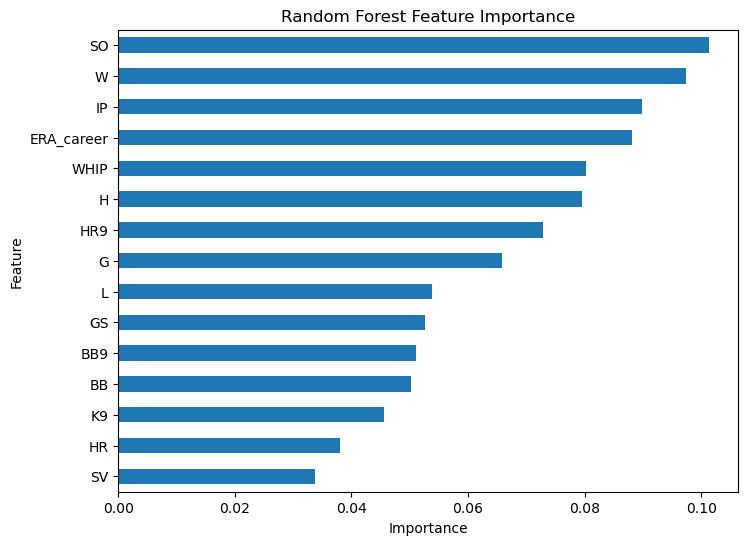

In [27]:
importances.plot(kind="barh", figsize=(8,6))
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # highest importance on top
plt.show()